In [3]:
import pandas as pd
import numpy as np

# Now, we will load the data set and look at some initial rows and data types of the columns:
data = pd.read_excel('energtes.xlsx', skiprows =15, index_col=[0])

data.index = pd.to_datetime(data.index, format='%d.%m.%Y %H:%M:%S')
data = data.fillna(method='ffill')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)



                     Corrected Wind speed @ 79m  Operating velocity  \
Date                                                                  
2015-02-23 00:00:00                    5.961927            5.961927   
2015-02-23 00:10:00                    6.101075            6.101075   
2015-02-23 00:20:00                    6.518517            6.518517   
2015-02-23 00:30:00                    5.887002            5.887002   
2015-02-23 00:40:00                    5.822780            5.822780   

                     Power / kW  Energy /kWh  
Date                                          
2015-02-23 00:00:00  392.284111    65.380685  
2015-02-23 00:10:00  420.397088    70.066181  
2015-02-23 00:20:00  512.727971    85.454662  
2015-02-23 00:30:00  377.679316    62.946553  
2015-02-23 00:40:00  365.453252    60.908875  

 Data Types:
Corrected Wind speed @ 79m    float64
Operating velocity            float64
Power / kW                    float64
Energy /kWh                   float64
dtype: 

In [25]:
data.index


DatetimeIndex(['2015-02-23 00:00:00', '2015-02-23 00:10:00',
               '2015-02-23 00:20:00', '2015-02-23 00:30:00',
               '2015-02-23 00:40:00', '2015-02-23 00:50:00',
               '2015-02-23 01:00:00', '2015-02-23 01:10:00',
               '2015-02-23 01:20:00', '2015-02-23 01:30:00',
               ...
               '2016-02-22 22:20:00', '2016-02-22 22:30:00',
               '2016-02-22 22:40:00', '2016-02-22 22:50:00',
               '2016-02-22 23:00:00', '2016-02-22 23:10:00',
               '2016-02-22 23:20:00', '2016-02-22 23:30:00',
               '2016-02-22 23:40:00', '2016-02-22 23:50:00'],
              dtype='datetime64[ns]', name='Date', length=52560, freq=None)

In [5]:
import matplotlib.pyplot as plt
ts = data['Energy /kWh']
ts.plot

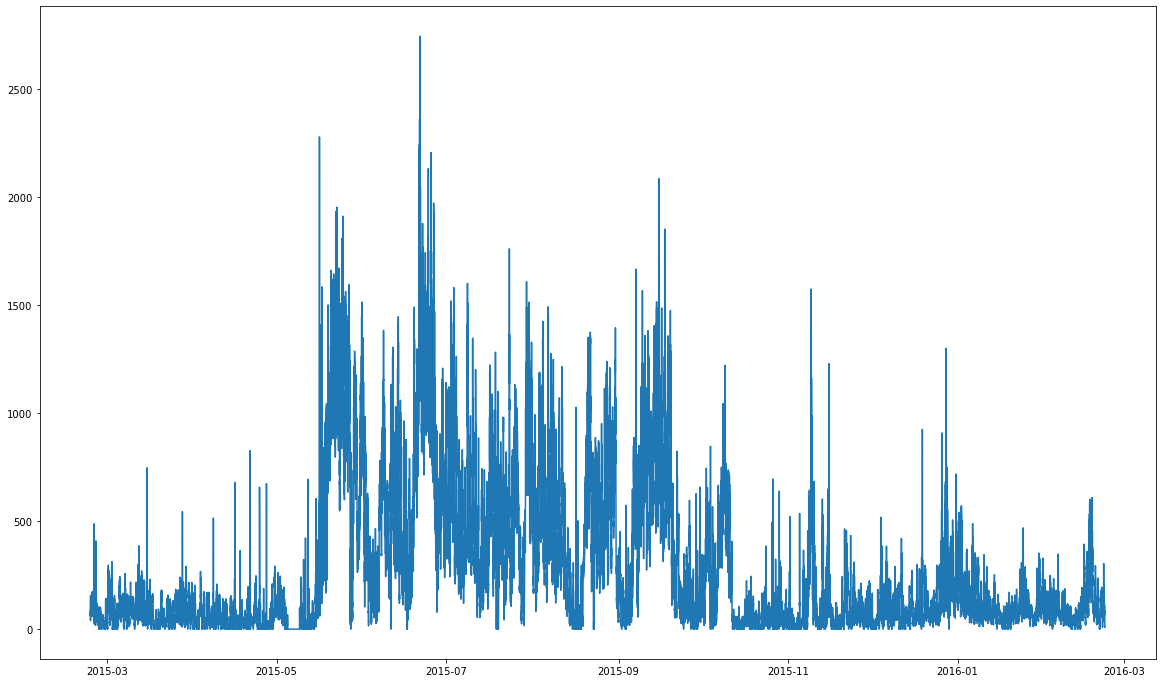

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,12]
#plt.plot(ts)
plt.plot(ts)

In [142]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

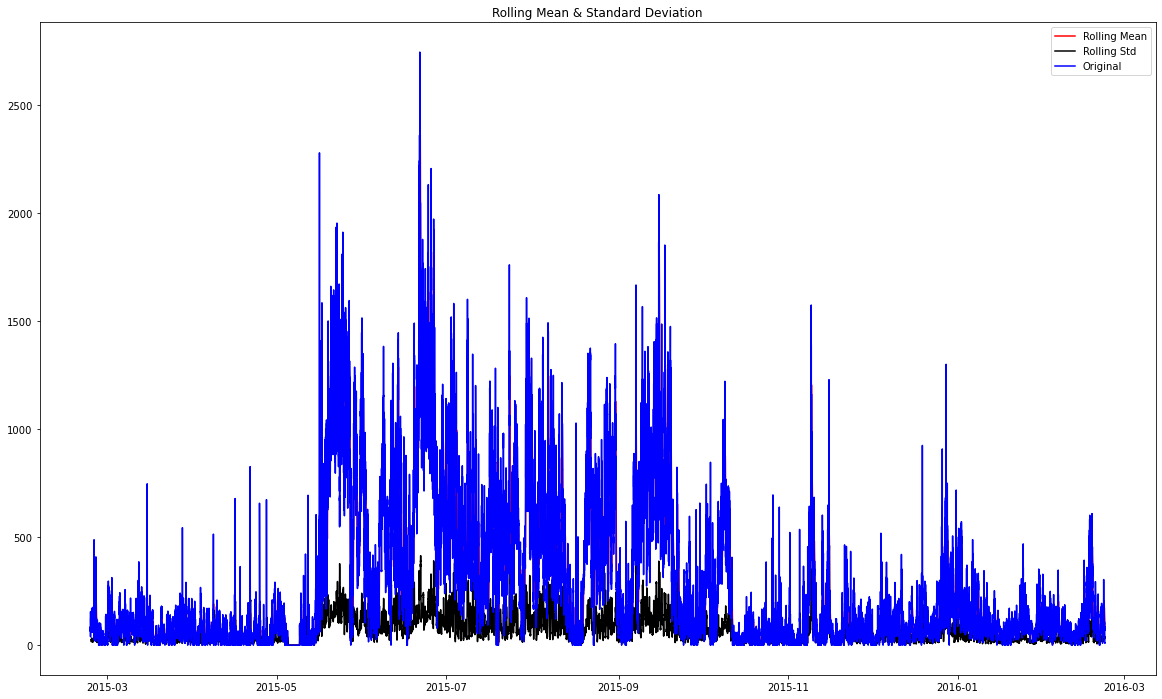

In [43]:
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
orig = plt.plot(ts, color='blue',label='Original')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [36]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.002934e+01
p-value                        1.600371e-17
#Lags Used                     5.800000e+01
Number of Observations Used    5.250100e+04
Critical Value (1%)           -3.430475e+00
Critical Value (5%)           -2.861595e+00
Critical Value (10%)          -2.566799e+00
dtype: float64


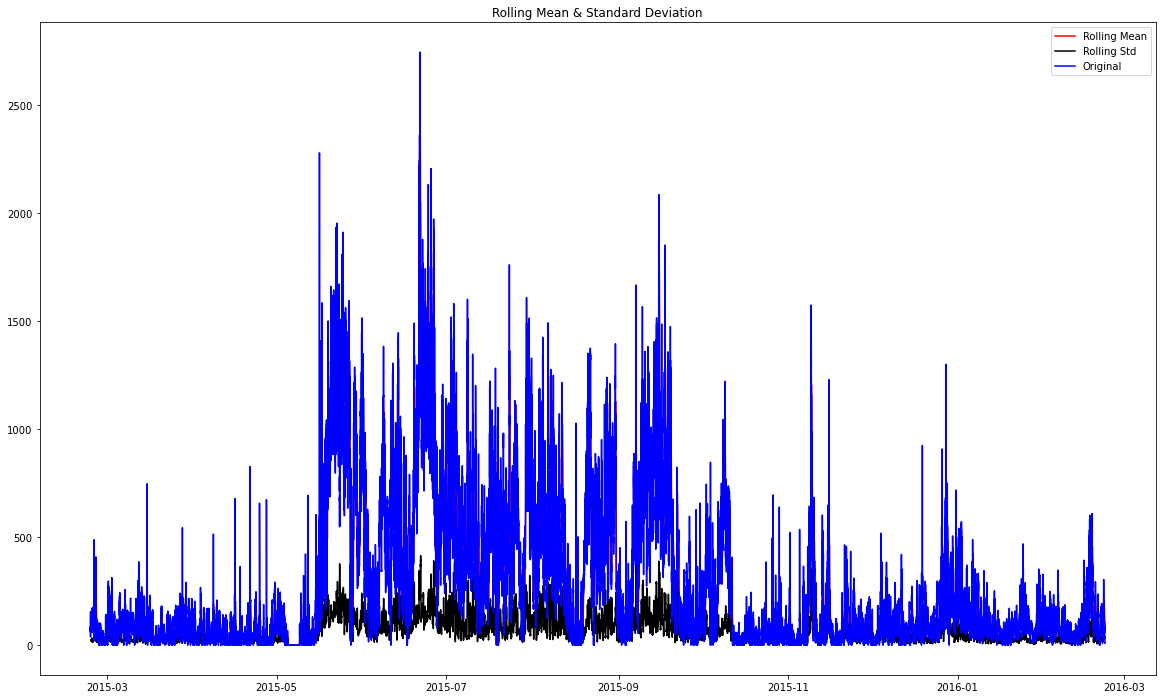

Results of Dickey-Fuller Test:
Test Statistic                -1.002934e+01
p-value                        1.600371e-17
#Lags Used                     5.800000e+01
Number of Observations Used    5.250100e+04
Critical Value (1%)           -3.430475e+00
Critical Value (5%)           -2.861595e+00
Critical Value (10%)          -2.566799e+00
dtype: float64


In [44]:
test_stationarity(ts)

In [ ]:
#series is non-stationary. This can becasue of 1. Trend – varying mean over time. 
#2. Seasonality – variations at specific time-frame


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


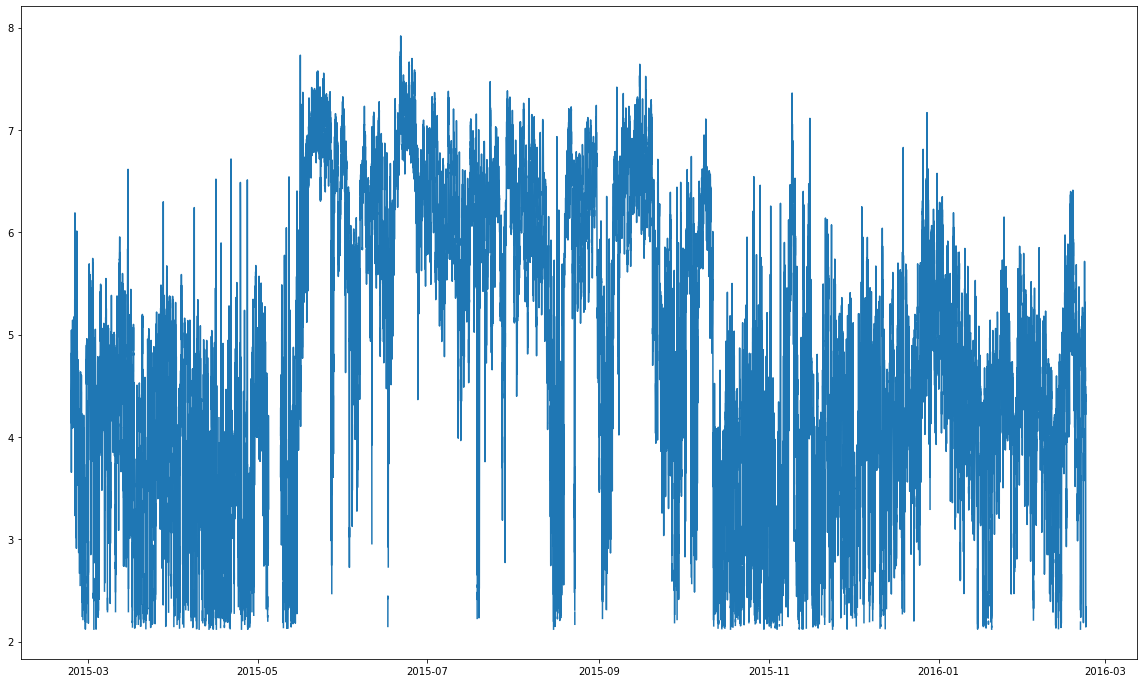

In [196]:
#estimatin and eliminating trend
ts_log = np.log(data)
plt.plot(ts_log['Energy /kWh'])


In [197]:
#ts_log


,Corrected Wind speed @ 79m,Operating velocity,Power / kW,Energy /kWh
Date,,,,
2015-02-23 00:00:00,1.785394,1.785394,5.971986,4.180227
2015-02-23 00:10:00,1.808465,1.808465,6.041200,4.249440
2015-02-23 00:20:00,1.874647,1.874647,6.239745,4.447986
2015-02-23 00:30:00,1.772747,1.772747,5.934045,4.142286
2015-02-23 00:40:00,1.761778,1.761778,5.901138,4.109379
...,...,...,...,...
2016-02-22 23:10:00,1.034983,-inf,-inf,2.318874
2016-02-22 23:20:00,1.106507,1.106507,3.935326,2.143567
2016-02-22 23:30:00,1.079600,-inf,-inf,2.143567


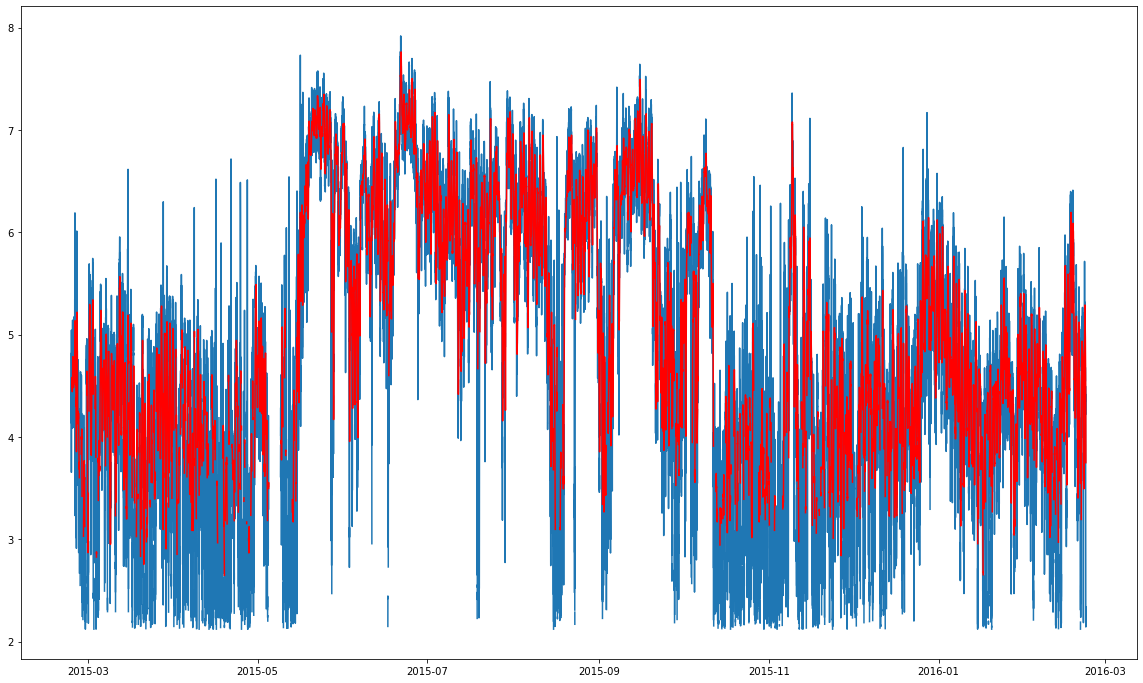

In [198]:
moving_avg = ts_log['Energy /kWh'].rolling(30).mean()
moving_Std = ts_log['Energy /kWh'].rolling(30).std()
plt.plot(ts_log['Energy /kWh'])
plt.plot(moving_avg, color='red')

In [199]:
ts_log_moving_avg_diff = ts_log['Energy /kWh'] - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(40)

Date
2015-02-23 04:50:00    0.083793
2015-02-23 05:00:00   -0.096034
2015-02-23 05:10:00    0.119525
2015-02-23 05:20:00    0.270112
2015-02-23 05:30:00    0.311218
2015-02-23 05:40:00   -0.200573
2015-02-23 05:50:00   -0.283504
2015-02-23 06:00:00   -0.135718
2015-02-23 06:10:00   -0.459841
2015-02-23 06:20:00    0.101131
2015-02-23 06:30:00   -0.083161
2015-02-23 06:40:00   -0.321084
2015-02-23 06:50:00   -0.038977
2015-02-23 07:00:00    0.001606
2015-02-23 07:10:00   -0.317589
2015-02-23 07:20:00   -0.338338
2015-02-23 07:30:00   -0.298406
2015-02-23 07:40:00   -0.092918
2015-02-23 07:50:00   -0.069908
2015-02-23 08:00:00   -0.095893
2015-02-23 08:10:00   -0.079940
2015-02-23 08:20:00    0.047948
2015-02-23 08:30:00    0.060862
2015-02-23 08:40:00    0.173726
2015-02-23 08:50:00   -0.019884
2015-02-23 09:00:00    0.459984
2015-02-23 09:10:00    0.173269
2015-02-23 09:20:00    0.393473
2015-02-23 09:30:00    0.325001
2015-02-23 09:40:00    0.241542
2015-02-23 09:50:00   -0.088877
201

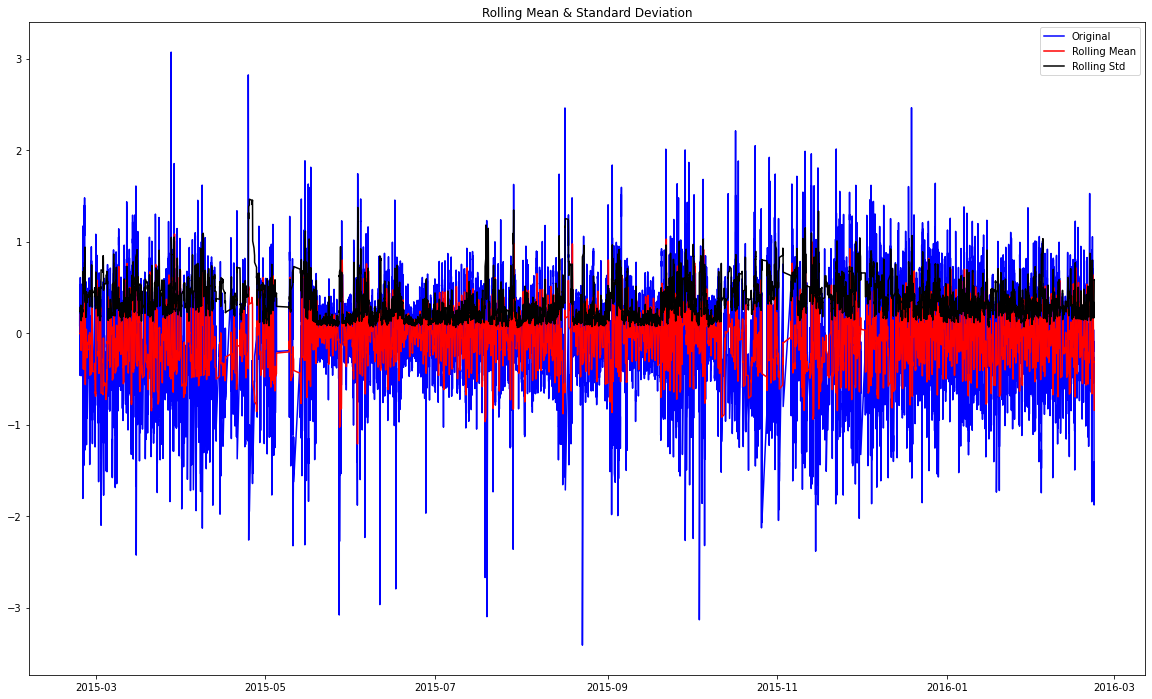

Results of Dickey-Fuller Test:
Test Statistic                   -31.202297
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41875.000000
Critical Value (1%)               -3.430506
Critical Value (5%)               -2.861609
Critical Value (10%)              -2.566807
dtype: float64


In [200]:
test_stationarity(ts_log_moving_avg_diff)

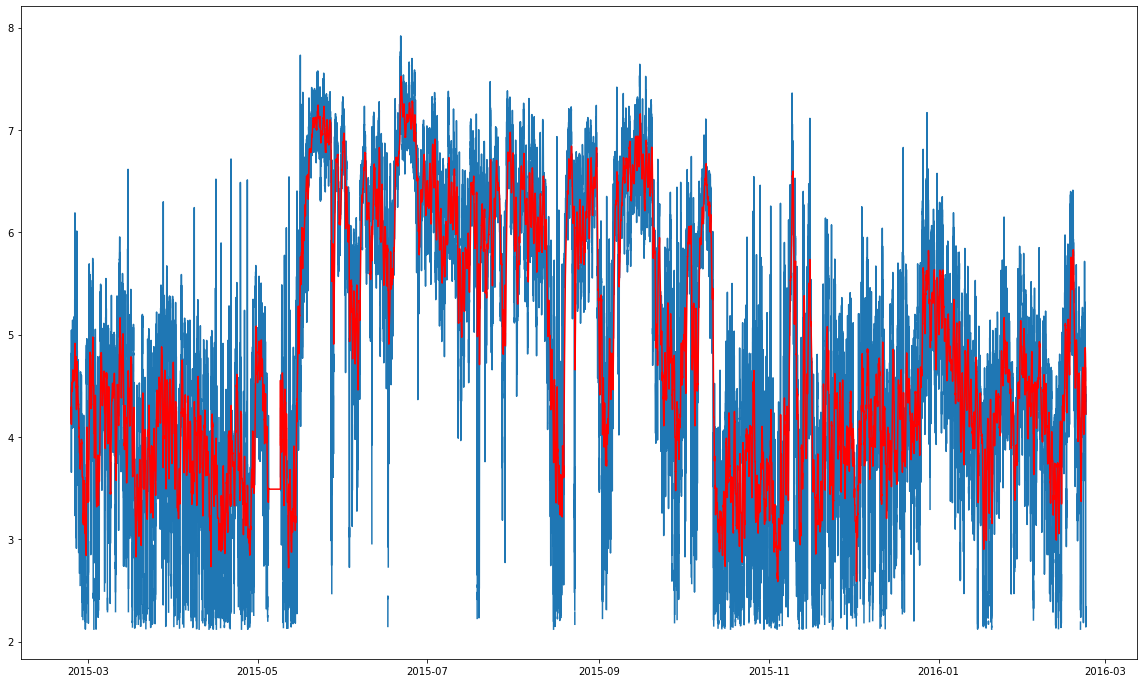

In [201]:
#weighted avg
expwighted_avg = ts_log['Energy /kWh'].ewm(halflife=30, min_periods=0, adjust=True).mean()
plt.plot(ts_log['Energy /kWh'])
plt.plot(expwighted_avg, color='red')

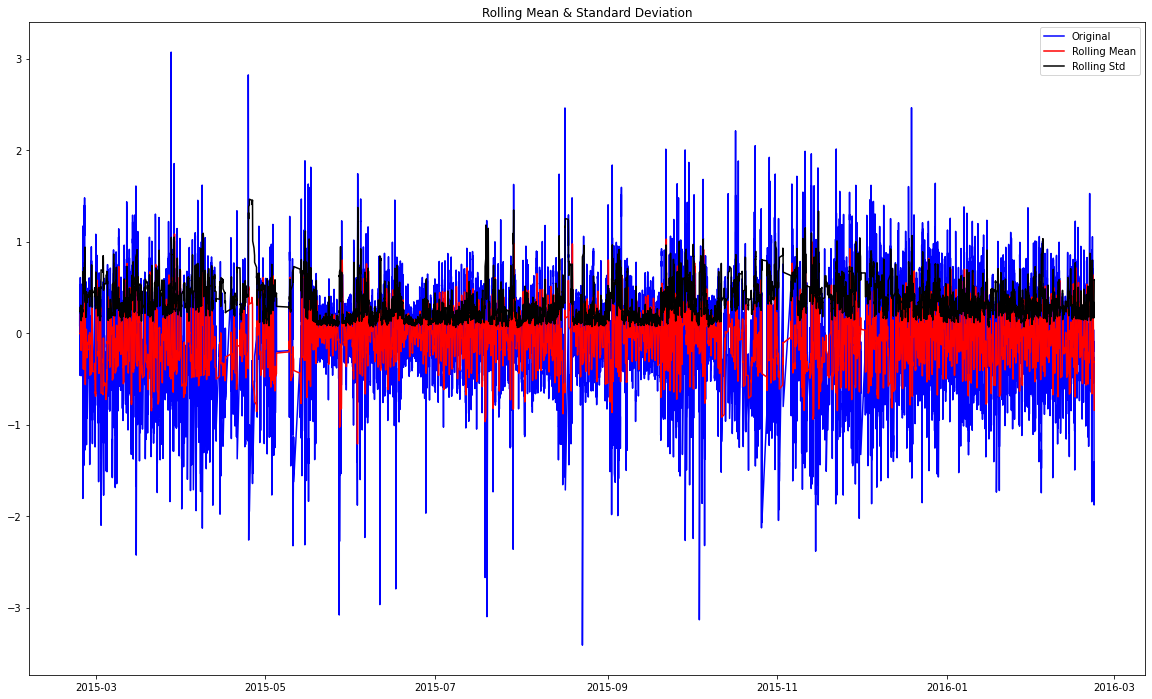

Results of Dickey-Fuller Test:
Test Statistic                   -31.202297
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41875.000000
Critical Value (1%)               -3.430506
Critical Value (5%)               -2.861609
Critical Value (10%)              -2.566807
dtype: float64


In [203]:
ts_log_ewma_diff = ts_log['Energy /kWh'] - expwighted_avg
test_stationarity(ts_log_moving_avg_diff)

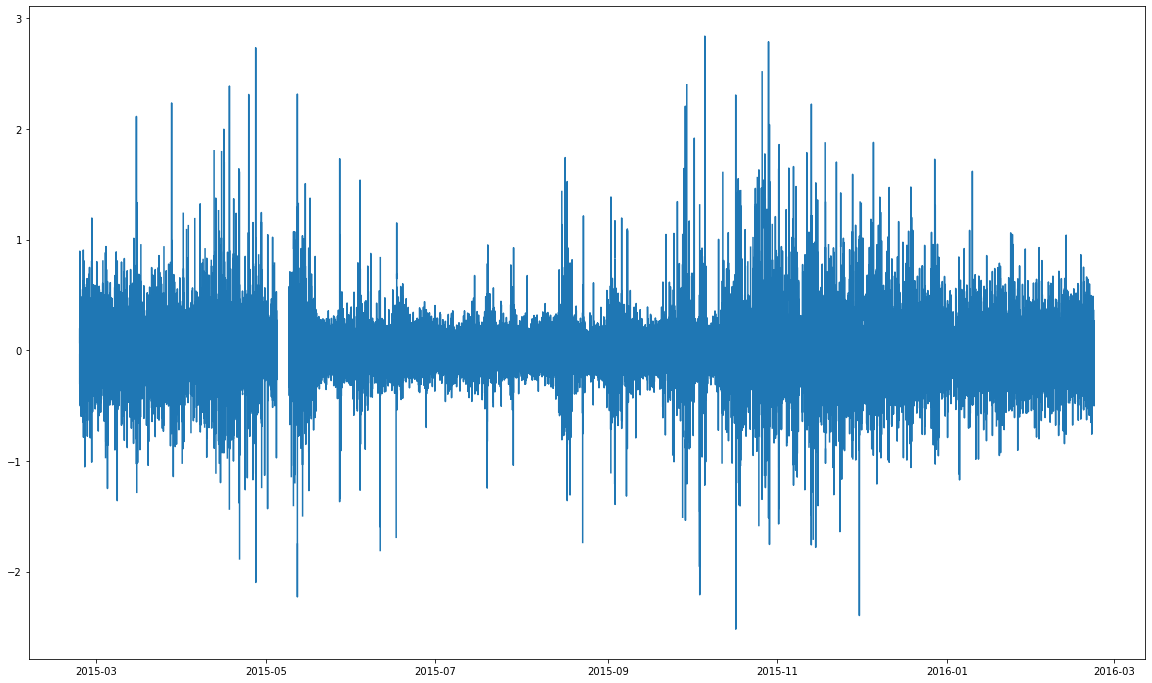

In [206]:
#differencing
ts_log_diff = ts_log['Energy /kWh'] - ts_log['Energy /kWh'].shift()
plt.plot(ts_log_diff)


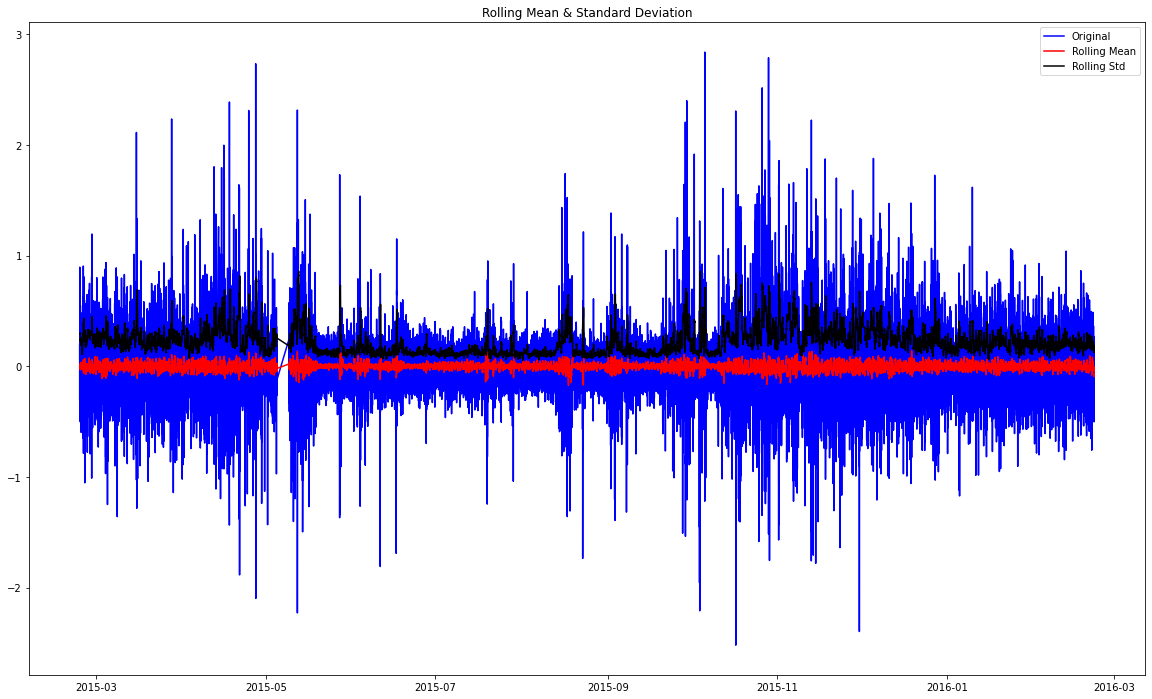

Results of Dickey-Fuller Test:
Test Statistic                   -36.409762
p-value                            0.000000
#Lags Used                        56.000000
Number of Observations Used    48007.000000
Critical Value (1%)               -3.430486
Critical Value (5%)               -2.861600
Critical Value (10%)              -2.566802
dtype: float64


In [208]:
ts_log_diff = ts_log_diff.replace([np.inf, -np.inf], np.nan)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [211]:
ts_log['Energy /kWh'] = ts_log['Energy /kWh'].replace([np.inf, -np.inf], np.nan)
ts_log['Energy /kWh'].dropna(inplace=True)

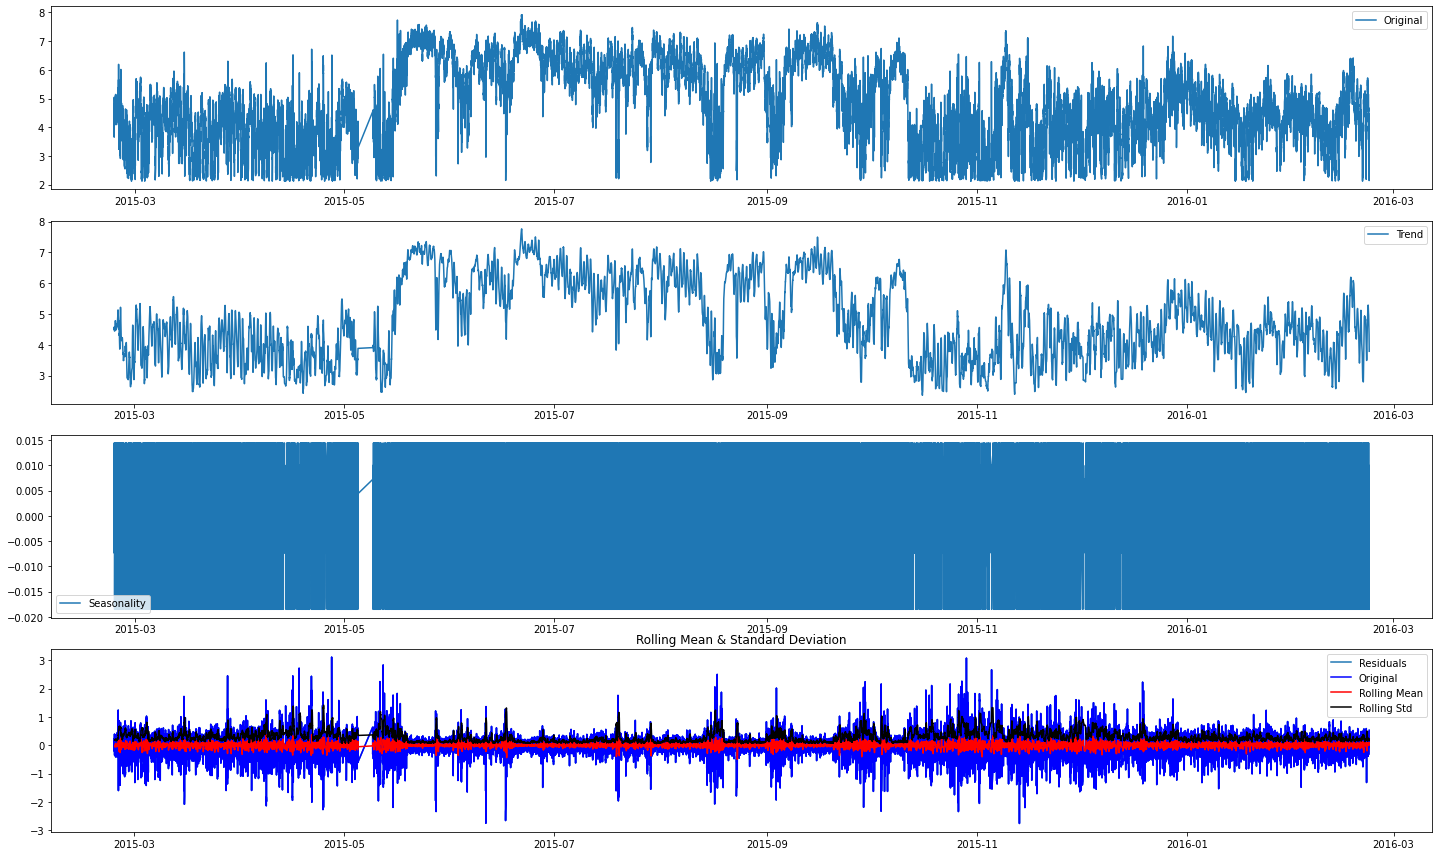

Results of Dickey-Fuller Test:
Test Statistic                   -44.766937
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    48511.000000
Critical Value (1%)               -3.430485
Critical Value (5%)               -2.861600
Critical Value (10%)              -2.566802
dtype: float64


In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log['Energy /kWh'], period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log['Energy /kWh'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


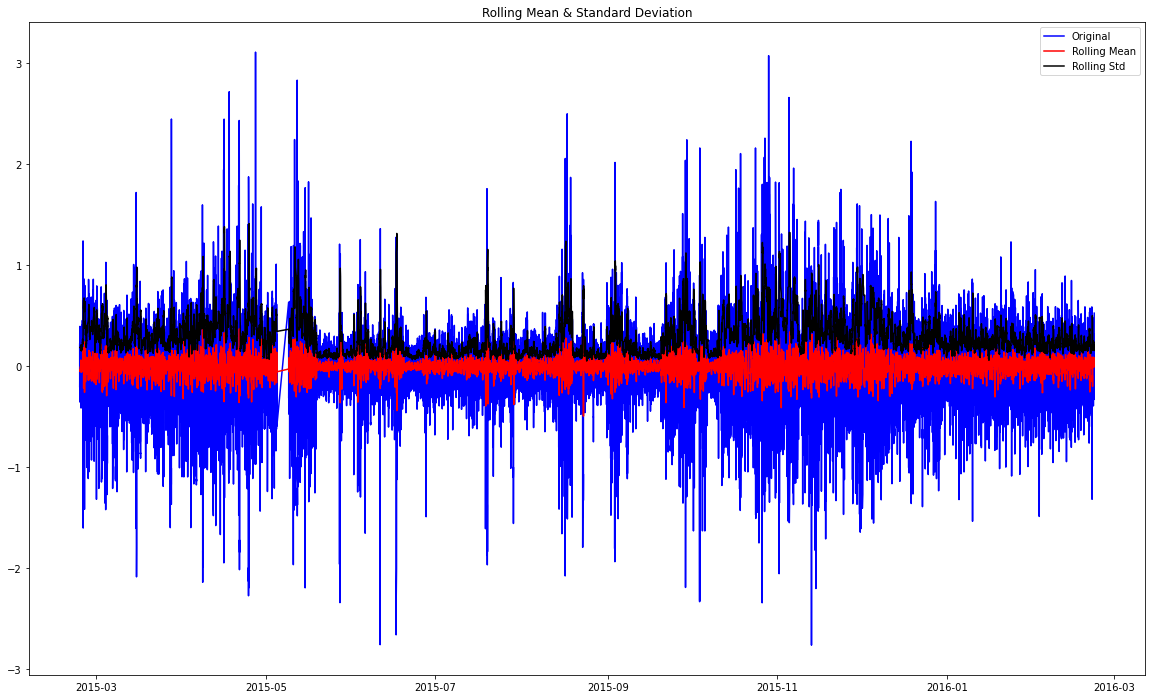

Results of Dickey-Fuller Test:
Test Statistic                   -44.766937
p-value                            0.000000
#Lags Used                        57.000000
Number of Observations Used    48511.000000
Critical Value (1%)               -3.430485
Critical Value (5%)               -2.861600
Critical Value (10%)              -2.566802
dtype: float64


In [213]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

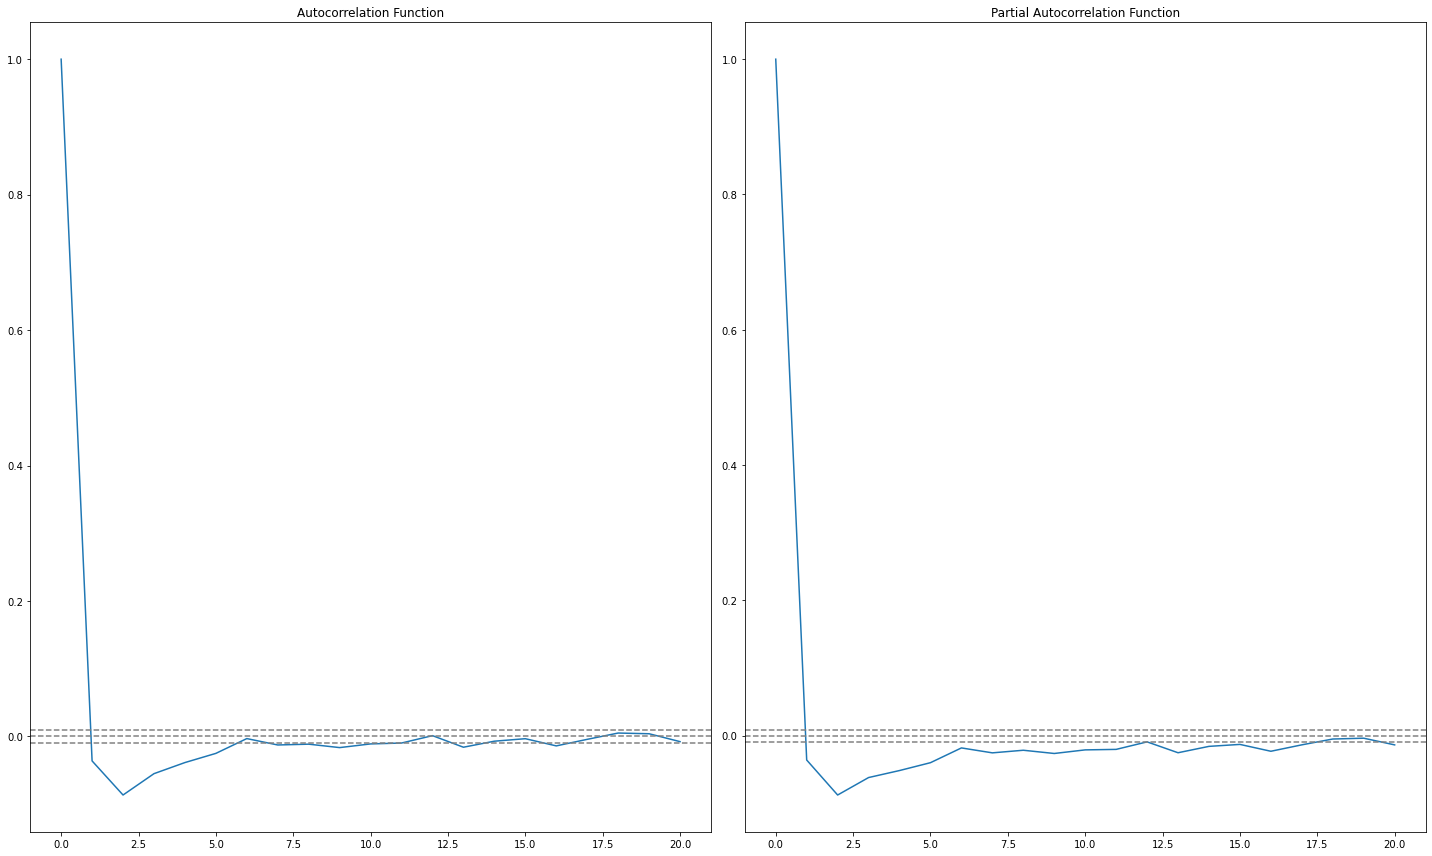

In [214]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
plt.rcParams["figure.figsize"] = [20, 12]
lag_acf = acf(ts_log_diff, nlags=20, fft=False)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#p,q = 0.025

In [220]:
ts_log['Energy /kWh']



Date
2015-02-23 00:00:00    4.180227
2015-02-23 00:10:00    4.249440
2015-02-23 00:20:00    4.447986
2015-02-23 00:30:00    4.142286
2015-02-23 00:40:00    4.109379
                         ...   
2016-02-22 23:10:00    2.318874
2016-02-22 23:20:00    2.143567
2016-02-22 23:30:00    2.143567
2016-02-22 23:40:00    2.242793
2016-02-22 23:50:00    2.338841
Name: Energy /kWh, Length: 48599, dtype: float64

In [223]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model = ARIMA(np.log(data['Energy /kWh']), order=(2, 1, 1))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_diff)**2))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)


MemoryError: Unable to allocate 20.5 GiB for an array with shape (52502, 52502) and data type float64

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

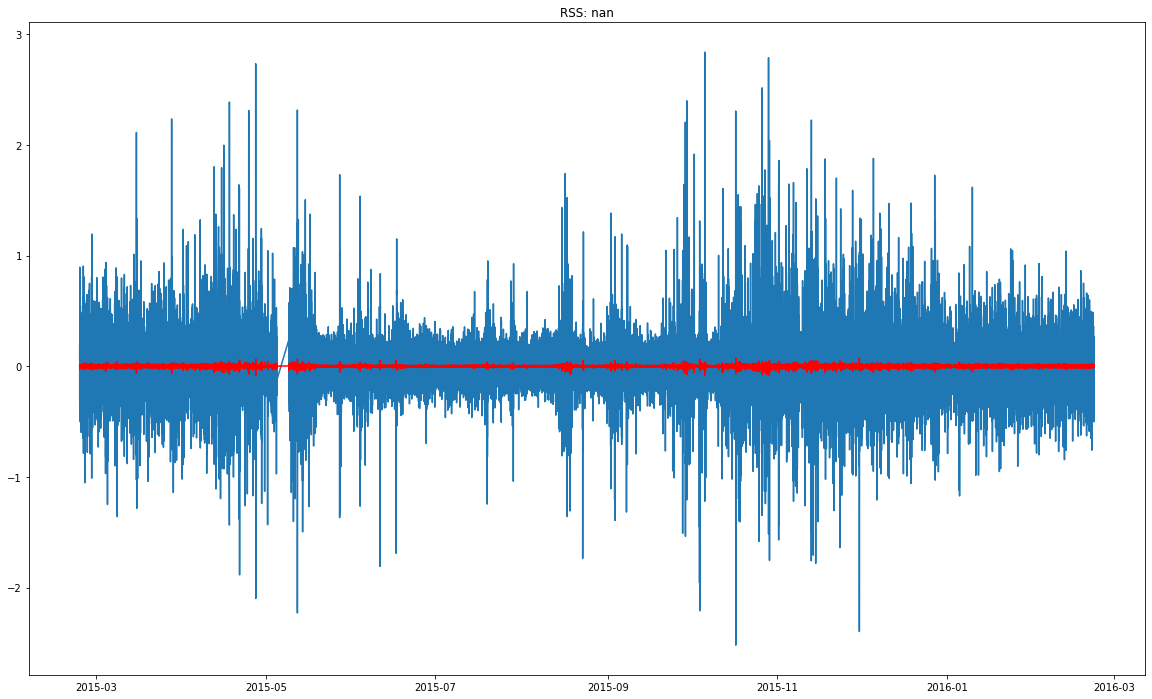

In [222]:
#MA mode
model = ARIMA(ts_log['Energy /kWh'], order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log['Energy /kWh'])**2))

In [186]:
#combined
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


MemoryError: Unable to allocate 17.6 GiB for an array with shape (48542, 48542) and data type float64